# HOMEWORK: Carlos Roberto Valdivia Garcia

## 1.- Derive Bayes theorem from $p(x,y)=p(y,x)$.

### Tenemos de la regla del producto
### $p(x,y)=p(x|y)p(y)$
### y partiendo de
### $p(x,y)=p(y,x)$
### tenemos entonces 
### $p(x,y)=p(x|y)p(y)=p(y|x)p(x)=p(y,x)$
### y despejando de la expresión anteior tenemos finalmente:
### $p(y|x)=\frac{p(x|y)p(y)}{p(x)}$

## 2.- Las catafixias de chabelo:

### Hay 3 puertas,detrás de una hay un premio. Supongamos que eliges la puerta 2, Chabelo abre la puerta 1 y allí no hay un premio. ¿Te quedas con tu elección original o cambias a la puerta 3?

Si sólo escojo una de las 3 puertas, tendré una probabilidad de escoger una puerta que contenga el premio será igual a $p(ganar)=\frac{1}{3}$, pero si después de haber elegido una puerta y Chabelo abre una de las no escogidas la cuál no contiene el premio y se nos da la opción de escoger entre las dos restantes, uno pensaría que la probabilidad de ganar si cambiamos nuestra elección inicial sería $1/2$ pero en realidad eso no es cierto, el teorema de Bayes nos permite encontrar la verdadera probabilidad. Si definimos de la demostración anterior:

### -$p(y)\rightarrow$ Probabilidad de elegir la puerta que NO contiene el premio antes de cambiar la elección incial.

### -$p(x|y) \rightarrow$ Probabilidad de obtener el premio al cambiar la elección inicial por la opción restante dado que inicialmente había elegido una que NO contenía el premio.

### -$p(x) \rightarrow$ Probabilidad de obtener el premio el premio si se cambia a la opción restante.

### -$p(y|x) \rightarrow$ Probabilidad  de escoger una puerta errónea inicialmente dado que al cambiar de opinión se elige la que SÍ contiene el premio.

donde:
### $p(x)$ es nuestra probabilidad de interés.
### $p(y)=\frac{2}{3}$
### $p(x|y)=1$
### $p(y|x)=1$
### y del teorema de Bayes tenemos entonces que:
### $p(x)=\frac{(1)(\frac{2}{3})}{(1)}= \frac{2}{3}$

### por el resultado anterior vemos que si mantenemos la elección inicial tenemos $1/3$ de probabilidad de ganar el premio, pero si elegimos cambiar nuestra opción inicial una vez que se nos revela una de las puertas sin el premio la probabilidad de elegir la puerta con el premio es $2/3$. 
## Por lo tanto es más conveniente cambiar de elección.

# 3.-MCMC Metropolis Algorithm:

### Implement it in Python and make sure it works for the example of the straight line, but do it in a way it is easy to change data, model, likelihood and prior.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

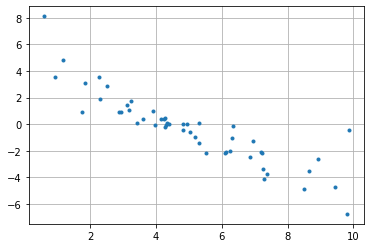

In [4]:
arr = np.load('fit_exercise.npy')
x= arr[0]
y= arr[1]
z=arr[2]
plt.plot(arr[0], arr[1], 'o', label='Original data', markersize=3)
plt.grid()

-0.9821623517930427 4.57785930375336


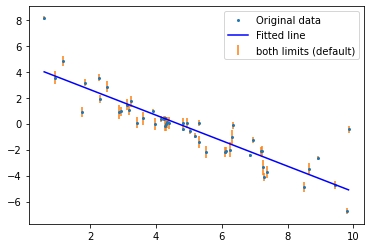

In [7]:
#Ajuste
A = np.vstack([arr[0], np.ones(len(arr[0]))]).T
p, b = np.linalg.lstsq(A, arr[1], rcond=None)[0]

print(p, b)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(arr[0], p*arr[0] + b, 'b', label='Fitted line')
plt.errorbar(arr[0], arr[1],yerr= arr[2],ls='',label='both limits (default)')
plt.legend()
plt.show()

In [11]:
Old=[-0.98,4.47,0.05]
New=np.zeros(3)

def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

In [12]:
def muestreo(Old, x, y):   
    #calculamos las propuestas de los parámetros de la recta de manera aleatoria
    New[0]=  np.random.normal(Old[0], Old[2])
    New[1]=  np.random.normal(Old[1], Old[2])
    New[2]=Old[2]

    #calculamos el posterior para el caso anterior y el nuevo (aleatorio)
    P_Old = -log_posterior(Old,x,y)
    P_New = -log_posterior(New,x,y)


    #si es mayor el nuevo posterior lo aceptamos
    if P_New>P_Old:

            Old= New
    
    #si no es mayor comparamos la división del posterior nuevo con el anterior con un número al azar entre cero y 1, si es mayor 
    #lo aceptamos       
    else:

            P_Ok = P_New / P_Old
            accept = np.random.rand() 

            if accept< P_Ok:
            # Update position
                Old= New
   
    return Old

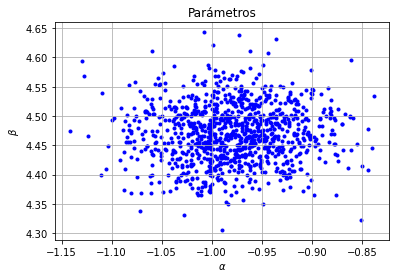

pendiente -0.9793700454224209
ordenada al origen 4.470775354617627


In [13]:
#graficamos los resultados de los parámetros
Oldie=[Old]
for i in range(1000):
    Oldie=np.append(Oldie,[muestreo(Old,x,y)],axis=0)

plt.grid()
plt.title('Parámetros')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.scatter(Oldie[:,0],Oldie[:,1], marker='.', c='b')
plt.show()

#imprimimos la media de los resultados de los parámetros
print('pendiente '+str(np.mean(Oldie[:,0])))
print('ordenada al origen '+str(np.mean(Oldie[:,1])))
